In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test  =  x_train/255.0,x_test/255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96,(3,3),strides=1,padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.MaxPool2D((3,3),strides=2,padding='valid'),
                        
    tf.keras.layers.Conv2D(256,(3,3),strides=1,padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.MaxPool2D((3,3),strides=2,padding='valid'),
    
    tf.keras.layers.Conv2D(384,(3,3),strides=1,padding='same',activation='relu'),
    
    tf.keras.layers.Conv2D(384,(3,3),strides=1,padding='same',activation='relu'),
    
    tf.keras.layers.Conv2D(256,(3,3),strides=1,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D((3,3),strides=2,padding='valid'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(2048,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(2048,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    
    tf.keras.layers.Dense(10,activation='softmax'),   
])

In [5]:
model.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['acc'])

In [6]:
history = model.fit(x_train,y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data = (x_test,y_test),
                    validation_freq=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 41s 818us/sample - loss: 1.6248 - acc: 0.4011 - val_loss: 1.3449 - val_acc: 0.5019
Epoch 2/20
50000/50000 [==============================] - 35s 706us/sample - loss: 1.2644 - acc: 0.5516 - val_loss: 1.1476 - val_acc: 0.6007
Epoch 3/20
50000/50000 [==============================] - 35s 700us/sample - loss: 1.1240 - acc: 0.6055 - val_loss: 1.2256 - val_acc: 0.5613
Epoch 4/20
50000/50000 [==============================] - 35s 692us/sample - loss: 1.0428 - acc: 0.6389 - val_loss: 1.2081 - val_acc: 0.5766
Epoch 5/20
50000/50000 [==============================] - 35s 695us/sample - loss: 0.9851 - acc: 0.6600 - val_loss: 0.9297 - val_acc: 0.6773
Epoch 6/20
50000/50000 [==============================] - 35s 693us/sample - loss: 0.9321 - acc: 0.6797 - val_loss: 1.0371 - val_acc: 0.6366
Epoch 7/20
50000/50000 [==============================] - 35s 692us/sample - loss: 0.8985 - acc: 0.6918 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  2688      
_________________________________________________________________
batch_normalization (BatchNo multiple                  384       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  221440    
_________________________________________________________________
batch_normalization_1 (Batch multiple                  1024      
_________________________________________________________________
activation_1 (Activation)    multiple                  0

In [9]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [10]:
loss =  history.history.get('loss')
val_loss =history.history.get('val_loss')

In [11]:
acc =  history.history.get('acc')
val_acc =history.history.get('val_acc')

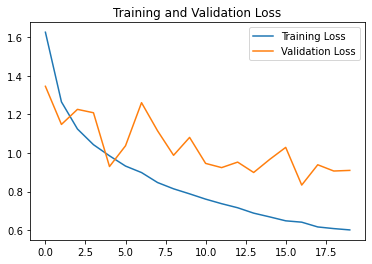

In [12]:
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

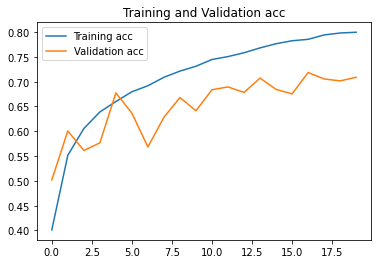

In [13]:
plt.plot(acc,label='Training acc')
plt.plot(val_acc,label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()